In [1]:
#we are taking a raw look at what data looks like in panda frame
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

d= pd.read_csv('DSCI6002_prj1_data.csv',header=None)
print(d)
print(d[0].unique())


                 0     1
0     Less than HS  45.0
1     Less than HS  26.0
2     Less than HS  43.8
3     Less than HS  34.4
4     Less than HS  76.2
...            ...   ...
1167      Graduate  52.7
1168      Graduate  59.8
1169      Graduate  54.1
1170      Graduate  39.9
1171      Graduate  58.2

[1172 rows x 2 columns]
['Less than HS' 'HS' 'Jr Coll' "Bachelor's" 'Graduate']


In [2]:
#checking data type,   result: yes it is data frame
print(type(d))

<class 'pandas.core.frame.DataFrame'>


In [3]:
#checking data shape,   result 1172 rows and 2 colums
print(d.shape)

(1172, 2)


In [4]:
#checking if there is missing value and data type,  result: no missing values
print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1172 non-null   object 
 1   1       1172 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.4+ KB
None


In [5]:
#checking unique values of catogorical colum,  results ['Less than HS' 'HS' 'Jr Coll' "Bachelor's" 'Graduate']
for col in d:
    print(d[0].unique())

['Less than HS' 'HS' 'Jr Coll' "Bachelor's" 'Graduate']
['Less than HS' 'HS' 'Jr Coll' "Bachelor's" 'Graduate']


In [6]:
#replace column names
d.columns = ['degree','value']
d

,degree,value
0,Less than HS,45.0
1,Less than HS,26.0
2,Less than HS,43.8
3,Less than HS,34.4
4,Less than HS,76.2
...,...,...
1167,Graduate,52.7
1168,Graduate,59.8
1169,Graduate,54.1
1170,Graduate,39.9


In [7]:
#pivot table back to box plot and do data conditions check
d_pivot = d.pivot(columns='degree', values='value').reset_index()
d_pivot.head(1400)
#'Lss than HS','HS','Jr Coll',"Bachelor's",'Graduate'

degree,index,Bachelor's,Graduate,HS,Jr Coll,Less than HS
0,0,NaN,NaN,NaN,NaN,45.0
1,1,NaN,NaN,NaN,NaN,26.0
2,2,NaN,NaN,NaN,NaN,43.8
3,3,NaN,NaN,NaN,NaN,34.4
4,4,NaN,NaN,NaN,NaN,76.2
...,...,...,...,...,...,...
1167,1167,NaN,52.7,NaN,NaN,NaN
1168,1168,NaN,59.8,NaN,NaN,NaN
1169,1169,NaN,54.1,NaN,NaN,NaN
1170,1170,NaN,39.9,NaN,NaN,NaN


C:\Users\prita\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Less than HS', ylabel='Density'>

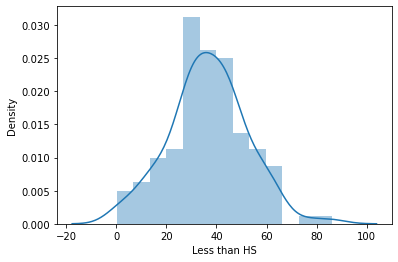

In [8]:
#Normality check ,using histogram
# checking column "Less than HS",  result: looking nomral
import seaborn as sns
sns.distplot(d_pivot['Less than HS'],bins='auto',hist=True)

C:\Users\prita\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Jr Coll', ylabel='Density'>

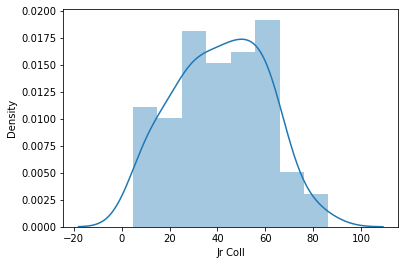

In [9]:
#Normality check ,using histogram
#checking column "Jr Coll",  result: looking different but treating as nomral
import seaborn as sns
sns.distplot(d_pivot['Jr Coll'],bins='auto',hist=True)

C:\Users\prita\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HS', ylabel='Density'>

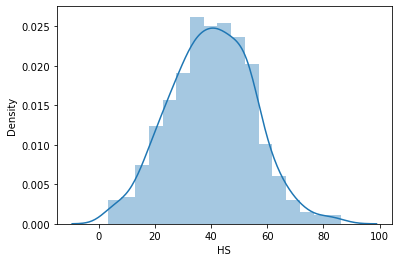

In [10]:
#Normality check ,using histogram
# checking column "HS",  result: looking nomral
import seaborn as sns
sns.distplot(d_pivot['HS'],bins='auto',hist=True)

C:\Users\prita\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Graduate', ylabel='Density'>

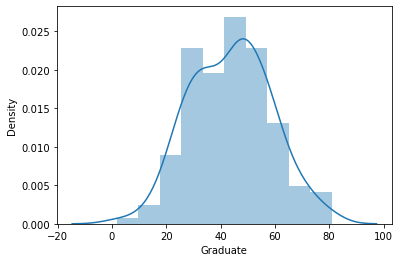

In [11]:
#Normality check ,using histogram
# checking column "Graudate",  result: looking nomral
import seaborn as sns
sns.distplot(d_pivot['Graduate'],bins='auto',hist=True)

C:\Users\prita\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="Bachelor's", ylabel='Density'>

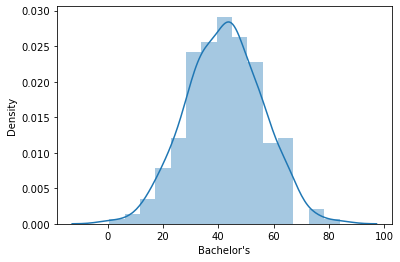

In [12]:
#Normality check ,using histogram
# checking column "Bachelor's",  result: looking nomral
import seaborn as sns
sns.distplot(d_pivot["Bachelor's"],bins='auto',hist=True)

<AxesSubplot:>

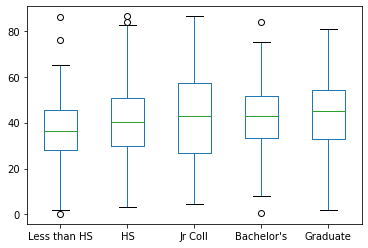

In [13]:
# Equal Varablity check:    result: looking equal
d_pivot.boxplot(column=['Less than HS','HS','Jr Coll',"Bachelor's",'Graduate'],grid=False)  # grid= lines in graph

In [14]:
#The dataset we are going to use for OLS
#giving new name for dataset "d" as d_melt 
d_melt = d 
d_melt

,degree,value
0,Less than HS,45.0
1,Less than HS,26.0
2,Less than HS,43.8
3,Less than HS,34.4
4,Less than HS,76.2
...,...,...
1167,Graduate,52.7
1168,Graduate,59.8
1169,Graduate,54.1
1170,Graduate,39.9


In [15]:
#OLS MODEL
#Y axis is "value", dependent variable, finding coeffcient of columb "degree" independent variable
#R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables.
#In percentage terms, we have 0.016 would mean our model explains 1.6% of the change in our ‘value’ variable

#looking at data of p values, if we set our significant level to 95%,  we only reject "Less than HS" H0hypothesis.
#H0:there is no correlation. Changes in the independent variable are associated with changes in the dependent variable at the population level.
#H1: there is correlation



model = ols('value ~ C(degree)', data= d_melt).fit()   #value is y, finding coeffcient of columb degree
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.619
Date:                Fri, 19 Nov 2021   Prob (F-statistic):            0.00106
Time:                        21:59:57   Log-Likelihood:                -4837.1
No. Observations:                1172   AIC:                             9684.
Df Residuals:                    1167   BIC:                             9709.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    42.2032      0.945     44.648      0.000      40.349      44.058
C(degree)[T.Graduate]         1.4968      1.534      0.976      0.329      -1.512       4.506
C(degree)[T.HS]              -2.0975      1.143     -1.834      0.067      -4.341       0.146
C(degree)[T.Jr Coll]         -1.0063      1.796     -0.560      0.575      -4.529       2.517
C(degree)[T.Less than HS]    -5.5668      1.662     -3.350      0.001      -8.827      -2.306
==============================================================================
Omnibus:                        0.432   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.806   Jarque-Bera (JB):                0.513
Skew:                           0.028   Prob(JB):                        0.774
Kurtosis:                       2.914   Cond. No.                         6.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#Anova Model
#sum_sq: SSG(sum square between group)=4176, measures the variability between groups
#sun_sq: SSE(sum square residual)= SST(sum square total) - SSG = 263802, measures the variablity within gorups
anova_table=sm.stats.anova_lm(model,typ=2)  #type explaination https://www.r-bloggers.com/2011/03/anova-%e2%80%93-type-iiiiii-ss-explained/
print(anova_table)

                  sum_sq      df         F    PR(>F)
C(degree)    4176.452688     4.0  4.618904  0.001056
Residual   263802.838942  1167.0       NaN       NaN


In [17]:
# Effect Size Calculations
esq_sm = anova_table['sum_sq'][0]/(anova_table['sum_sq'][0]+anova_table['sum_sq'][1])
anova_table['EtaSq']=[esq_sm,'Nah']
print(anova_table)

                  sum_sq      df         F    PR(>F)     EtaSq
C(degree)    4176.452688     4.0  4.618904  0.001056  0.015585
Residual   263802.838942  1167.0       NaN       NaN       Nah


In [18]:
#one-way ANOVA: multiple pairwise comparisons
#The pairwise t-test consists of calculating multiple t-test between all possible combinations of groups
#alpha= alpha/k , k(number of groups, our case is 5.    result:alpha = 0.05/5=0.01

pair_t= model.t_test_pairwise('C(degree)')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Graduate-Bachelor's,1.496838,1.533586,0.976038,0.329248,-1.512057,4.505733,0.698223,False
HS-Bachelor's,-2.097484,1.143460,-1.834331,0.066859,-4.340952,0.145984,0.292485,False
Jr Coll-Bachelor's,-1.006255,1.795528,-0.560423,0.575299,-4.529079,2.516569,0.760113,False
Less than HS-Bachelor's,-5.566798,1.661832,-3.349796,0.000835,-8.827311,-2.306286,0.007486,True
HS-Graduate,-3.594322,1.368362,-2.626733,0.008734,-6.279048,-0.909597,0.067772,False
Jr Coll-Graduate,-2.503093,1.946493,-1.285950,0.198716,-6.322110,1.315924,0.587763,False
Less than HS-Graduate,-7.063636,1.823897,-3.872826,0.000114,-10.642120,-3.485153,0.001135,True
Jr Coll-HS,1.091230,1.656638,0.658701,0.510218,-2.159092,4.341551,0.760113,False
Less than HS-HS,-3.469314,1.510700,-2.296494,0.021824,-6.433306,-0.505322,0.143123,False
Less than HS-Jr Coll,-4.560544,2.049057,-2.225679,0.026226,-8.580791,-0.540296,0.147393,False


In [19]:
#The Tukey HSD ("honestly significant difference" or "honest significant difference") test 
#is a statistical tool used to determine if the relationship between two sets of data is statistically significant 
#parameters: https://www.statsmodels.org/dev/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html
mc= sm.stats.multicomp.MultiComparison(d_melt['value'],d_melt['degree'])
mc_results=mc.tukeyhsd()
print(mc_results)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
Bachelor's     Graduate   1.4968 0.8514   -2.693  5.6867  False
Bachelor's           HS  -2.0975 0.3547  -5.2215  1.0265  False
Bachelor's      Jr Coll  -1.0063    0.9  -5.9117  3.8992  False
Bachelor's Less than HS  -5.5668 0.0074  -10.107 -1.0266   True
  Graduate           HS  -3.5943 0.0664  -7.3327  0.1441  False
  Graduate      Jr Coll  -2.5031 0.6756   -7.821  2.8148  False
  Graduate Less than HS  -7.0636 0.0011 -12.0466 -2.0807   True
        HS      Jr Coll   1.0912    0.9  -3.4348  5.6172  False
        HS Less than HS  -3.4693 0.1466  -7.5966   0.658  False
   Jr Coll Less than HS  -4.5605 0.1711 -10.1587  1.0376  False
---------------------------------------------------------------


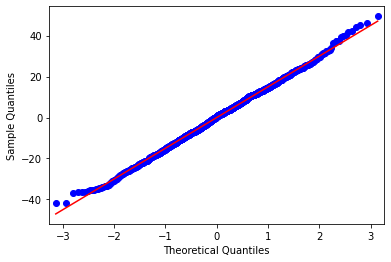

In [20]:
#Assumption checks               NNNNNNNNNNORMALITY
#normality
#using Q-Q plot
#line   's':standardized
#'45':45 degree line
# a Q–Q (quantile-quantile) plot is a probability plot, 
#which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.


#result: looking very normal too

res= model.resid   # stat function.  resid= residual
#Each residual is the difference between a entered value and the mean of all values for that group. 
fig=sm.qqplot(res,line='s') #

C:\Users\prita\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

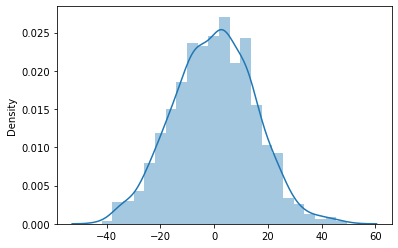

In [21]:
#Assumption checks               NNNNNNNNNNORMALITY  
#using histogram

#result also looking normal


import seaborn as sns
sns.distplot(res,bins='auto',hist=True)

In [22]:
#Assumption checks               NNNNNNNNNNORMALITY
#using shaprio-wilk test

#H0: the data are normally distributed. 
#h1:not nomrally distributed
#Alpha= 0.05

import scipy.stats as stats


w,pvalue= stats.shapiro(model.resid)                    #w is t statstic, pvalue is pvalue
print(w,pvalue)             #we cant not reject H0.  THere is strong evidence that the data are normally distributed. 

0.9983659982681274 0.33162370324134827


In [23]:
#Assumption checks              Homogeneity for equal variances
#bartlett's test
#Levene'test
#H0 = no difference in variances between the groups.    var1 = var 2= var3 = ...
#H1: var1 != !var 2= !var3 = ...


#bartlett'stest
w,pvalue= stats.bartlett(d_melt['value'][d_melt['degree']=='Less than HS'],
                        d_melt['value'][d_melt['degree']=='HS'],
                        d_melt['value'][d_melt['degree']=='Jr Coll'],
                        d_melt['value'][d_melt['degree']=="Bachelor's"],
                        d_melt['value'][d_melt['degree']=='Graduate'])


print(f"bartlett's test:         w:{w},  pvalue:={pvalue}")


# levene variance test, method 2
w,pvalue=  stats.levene(d_melt['value'][d_melt['degree']=='Less than HS'],
                        d_melt['value'][d_melt['degree']=='HS'],
                        d_melt['value'][d_melt['degree']=='Jr Coll'],
                        d_melt['value'][d_melt['degree']=="Bachelor's"],
                        d_melt['value'][d_melt['degree']=='Graduate'])
print(f"levene's test:         w:{w},  pvalue:={pvalue}")




# we reject H0.  there is strong evidence there are variances between groups.

bartlett's test:         w:17.742400811435832,  pvalue:=0.0013856596959012338
levene's test:         w:5.76170875894063,  pvalue:=0.00013618622296670516


In [24]:
'''LETS DO WITHOUT USING THE LIBRARY'''

'LETS DO WITHOUT USING THE LIBRARY'

In [25]:
d

,degree,value
0,Less than HS,45.0
1,Less than HS,26.0
2,Less than HS,43.8
3,Less than HS,34.4
4,Less than HS,76.2
...,...,...
1167,Graduate,52.7
1168,Graduate,59.8
1169,Graduate,54.1
1170,Graduate,39.9


In [26]:
d['mean']=d.mean()
d
mean=d['value'].mean()
mean

40.7659556313993

In [27]:
d['mean'].fillna(value=mean,inplace=True)
d

,degree,value,mean
0,Less than HS,45.0,40.765956
1,Less than HS,26.0,40.765956
2,Less than HS,43.8,40.765956
3,Less than HS,34.4,40.765956
4,Less than HS,76.2,40.765956
...,...,...,...
1167,Graduate,52.7,40.765956
1168,Graduate,59.8,40.765956
1169,Graduate,54.1,40.765956
1170,Graduate,39.9,40.765956


In [28]:
d['std_dev']=d['value'].std()

In [29]:
d

,degree,value,mean,std_dev
0,Less than HS,45.0,40.765956,15.127674
1,Less than HS,26.0,40.765956,15.127674
2,Less than HS,43.8,40.765956,15.127674
3,Less than HS,34.4,40.765956,15.127674
4,Less than HS,76.2,40.765956,15.127674
...,...,...,...,...
1167,Graduate,52.7,40.765956,15.127674
1168,Graduate,59.8,40.765956,15.127674
1169,Graduate,54.1,40.765956,15.127674
1170,Graduate,39.9,40.765956,15.127674


In [30]:
total_mean=d['mean'].mean()
total_std_dev=d['std_dev'].mean()
total_mean

40.765955631400416

In [31]:
df_group=5-1
df_total=1172-1
df_error= df_total-df_group
df_error


1167

In [32]:
d_pivot=pd.DataFrame(d_pivot)
print(d_pivot)
# d_pivot=d_pivot.dropna(how='any')
bachelor=d_pivot['Bachelor\'s'].mean()
bachelor
graduate=d_pivot['Graduate'].mean()
hs=d_pivot['HS'].mean()
jr_coll=d_pivot['Jr Coll'].mean()
less_than_hs=d_pivot['Less than HS'].mean()


degree  index  Bachelor's  Graduate  HS  Jr Coll  Less than HS
0           0         NaN       NaN NaN      NaN          45.0
1           1         NaN       NaN NaN      NaN          26.0
2           2         NaN       NaN NaN      NaN          43.8
3           3         NaN       NaN NaN      NaN          34.4
4           4         NaN       NaN NaN      NaN          76.2
...       ...         ...       ...  ..      ...           ...
1167     1167         NaN      52.7 NaN      NaN           NaN
1168     1168         NaN      59.8 NaN      NaN           NaN
1169     1169         NaN      54.1 NaN      NaN           NaN
1170     1170         NaN      39.9 NaN      NaN           NaN
1171     1171         NaN      58.2 NaN      NaN           NaN

[1172 rows x 6 columns]


In [33]:
d_pivot.count()

degree
index           1172
Bachelor's       253
Graduate         155
HS               546
Jr Coll           97
Less than HS     121
dtype: int64

In [34]:
s_S_G=(253*(bachelor-total_mean)**2)+(155*(graduate-total_mean)**2)+(546*(hs-total_mean)**2)+(97*(jr_coll-total_mean)**2)+(121*(less_than_hs-total_mean)**2)

In [35]:
s_S_G

4176.452687904745

In [36]:
d

,degree,value,mean,std_dev
0,Less than HS,45.0,40.765956,15.127674
1,Less than HS,26.0,40.765956,15.127674
2,Less than HS,43.8,40.765956,15.127674
3,Less than HS,34.4,40.765956,15.127674
4,Less than HS,76.2,40.765956,15.127674
...,...,...,...,...
1167,Graduate,52.7,40.765956,15.127674
1168,Graduate,59.8,40.765956,15.127674
1169,Graduate,54.1,40.765956,15.127674
1170,Graduate,39.9,40.765956,15.127674


In [37]:
s_S_T= ((d['value']-d['mean'])**2).sum()

In [38]:
s_S_T

267979.29162969283

In [39]:
s_S_E=s_S_T-s_S_G
s_S_E

263802.83894178807

In [40]:
m_S_G=s_S_G/4
m_S_E= s_S_E/df_error
f=m_S_G/m_S_E

In [41]:
f

4.618904317269629

In [42]:
df_group

4

In [43]:
stats.f(df_group,df_error).sf(f)

0.001055731814093054

In [44]:
'''

HENCE WE SEE THE VALUE IS VERY LOW AND NULL HYPOTHESIS REJECTED

'''

'\n\nHENCE WE SEE THE VALUE IS VERY LOW AND NULL HYPOTHESIS REJECTED\n\n'

In [45]:
alpha_star= 0.05/5

In [46]:
alpha_star

0.01

<AxesSubplot:>

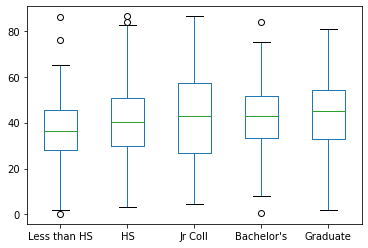

In [47]:
# Equal Varablity check:    result: looking equal
d_pivot.boxplot(column=['Less than HS','HS','Jr Coll',"Bachelor's",'Graduate'],grid=False)  # grid= lines in graph